In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('income_data.xlsx')

In [3]:
df

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,Unnamed: 8,"If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,2023-02-27 06:22:35.240,25-34,Computing or Tech,Sr software engineer,NaN,190000,14000.0,USD,NaN,NaN,United States,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American
27942,2023-03-01 09:43:37.098,45-54,Property or Construction,Property Manager,Senior,55000,13000.0,USD,NaN,NaN,United States,Ohio,Brunswick,21 - 30 years,11 - 20 years,NaN,NaN,NaN
27943,2023-03-06 18:16:18.899,25-34,Behavioral Health,Mental Health Therapist,NaN,52416,NaN,USD,NaN,NaN,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White
27944,2023-03-09 09:11:48.506,18-24,Computing or Tech,Help Desk Associate Analyst,NaN,36000,NaN,USD,NaN,NaN,United States,Illinois,Chicago,5-7 years,2 - 4 years,College degree,Man,Black or African American


In [4]:
#Dropped unwanted column's that didn't help our analysis

df = df.drop(columns=['Timestamp', 
                      'If your job title needs additional context, please clarify here:',
                      'If your income needs additional context, please provide it here:',
                      'Unnamed: 8' ])

In [5]:
df

,How old are you?,What industry do you work in?,Job title,"What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,25-34,Education (Higher Education),Research and Instruction Librarian,55000,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,25-34,Computing or Tech,Change & Internal Communications Manager,54600,4000.0,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,NaN,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,25-34,Nonprofits,Program Manager,62000,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,25-34,Computing or Tech,Sr software engineer,190000,14000.0,USD,United States,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American
27942,45-54,Property or Construction,Property Manager,55000,13000.0,USD,United States,Ohio,Brunswick,21 - 30 years,11 - 20 years,NaN,NaN,NaN
27943,25-34,Behavioral Health,Mental Health Therapist,52416,NaN,USD,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White
27944,18-24,Computing or Tech,Help Desk Associate Analyst,36000,NaN,USD,United States,Illinois,Chicago,5-7 years,2 - 4 years,College degree,Man,Black or African American


In [6]:
#Cleaned up and renamed all the columns so it's easier to read

df.rename(columns = {'How old are you?':'Age',
                     'What industry do you work in?':'Industry',
                     "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)":"Salary",
                     "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.":"Additional Compensation",
                     "Please indicate the currency":"Currency",
                     "What country do you work in?":"Country",
                     "If you're in the U.S., what state do you work in?":"US State",
                     "What city do you work in?": "City",
                     "How many years of professional work experience do you have overall?":"Years of Experience overal", 
                     "How many years of professional work experience do you have in your field?":"Years of experience in field",
                     "What is your highest level of education completed?":"Level of Education", 
                     "What is your gender?":"Gender","What is your race? (Choose all that apply.)":"Race"  },inplace=True)


In [7]:
#Filled all NaN values with appropriate responses

df['Additional Compensation'] = df['Additional Compensation'].fillna(0)
df['Gender'] = df['Gender'].fillna("Prefer not to answer")
df['Race'] = df['Race'].fillna("Prefer not to answer")
df['Level of Education'] = df['Level of Education'].fillna('Unspecified')
df['US State'] = df['US State'].fillna('Not in US')
df

,Age,Industry,Job title,Salary,Additional Compensation,Currency,Country,US State,City,Years of Experience overal,Years of experience in field,Level of Education,Gender,Race
0,25-34,Education (Higher Education),Research and Instruction Librarian,55000,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,25-34,Computing or Tech,Change & Internal Communications Manager,54600,4000.0,GBP,United Kingdom,Not in US,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,0.0,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,25-34,Nonprofits,Program Manager,62000,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,25-34,Computing or Tech,Sr software engineer,190000,14000.0,USD,United States,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American
27942,45-54,Property or Construction,Property Manager,55000,13000.0,USD,United States,Ohio,Brunswick,21 - 30 years,11 - 20 years,Unspecified,Prefer not to answer,Prefer not to answer
27943,25-34,Behavioral Health,Mental Health Therapist,52416,0.0,USD,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White
27944,18-24,Computing or Tech,Help Desk Associate Analyst,36000,0.0,USD,United States,Illinois,Chicago,5-7 years,2 - 4 years,College degree,Man,Black or African American


In [8]:
#Cleaning up and replacing misspelled words

df['Gender'].replace(to_replace="Man", value="Male", inplace=True)
df['Gender'].replace(to_replace="Woman", value="Female", inplace=True)

df['Country'].replace(to_replace="United States", value="US", inplace=True)
df['Country'].replace(to_replace="USA", value="US", inplace=True)
df['Country'].replace(to_replace=" United States", value="US", inplace=True)
df['Country'].replace(to_replace="usa", value="US", inplace=True)
df['Country'].replace(to_replace="U.S.", value="US", inplace=True)
df['Country'].replace(to_replace="United State", value="US", inplace=True)
df['Country'].replace(to_replace="United states", value="US", inplace=True)
df['Country'].replace(to_replace="United States of America", value="US", inplace=True)
df['Country'].replace(to_replace="United Kingdom", value="UK", inplace=True)
df['Country'].replace(to_replace="United Kingdom ", value="UK", inplace=True)

df

,Age,Industry,Job title,Salary,Additional Compensation,Currency,Country,US State,City,Years of Experience overal,Years of experience in field,Level of Education,Gender,Race
0,25-34,Education (Higher Education),Research and Instruction Librarian,55000,0.0,USD,US,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Female,White
1,25-34,Computing or Tech,Change & Internal Communications Manager,54600,4000.0,GBP,UK,Not in US,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,0.0,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Female,White
3,25-34,Nonprofits,Program Manager,62000,3000.0,USD,US,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Female,White
4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Female,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,25-34,Computing or Tech,Sr software engineer,190000,14000.0,USD,United States,Texas,Dallas,5-7 years,5-7 years,College degree,Male,Asian or Asian American
27942,45-54,Property or Construction,Property Manager,55000,13000.0,USD,US,Ohio,Brunswick,21 - 30 years,11 - 20 years,Unspecified,Prefer not to answer,Prefer not to answer
27943,25-34,Behavioral Health,Mental Health Therapist,52416,0.0,USD,US,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Female,White
27944,18-24,Computing or Tech,Help Desk Associate Analyst,36000,0.0,USD,US,Illinois,Chicago,5-7 years,2 - 4 years,College degree,Male,Black or African American


In [9]:
#The cells below show the descriptive stats of certain currencies throughout the world

df[df['Currency'] == 'USD'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Salary,Additional Compensation
count,23288.00,23288.00
mean,96399.62,9567.70
std,671728.52,40932.85
min,0.00,0.00
25%,56000.00,0.00
50%,78278.50,0.00
75%,112000.00,6000.00
max,102000000.00,1500000.00


In [10]:
df[df['Currency'] == 'GBP'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Salary,Additional Compensation
count,1585.00,1585.00
mean,49921.65,4181.26
std,47324.55,16328.20
min,28.00,0.00
25%,30000.00,0.00
50%,40000.00,0.00
75%,58000.00,2000.00
max,950000.00,270000.00


In [11]:
df[df['Currency'] == 'CAD'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Salary,Additional Compensation
count,1665.00,1665.00
mean,82788.63,5197.15
std,42900.57,17821.17
min,52.00,0.00
25%,58000.00,0.00
50%,75795.00,0.00
75%,97500.00,4500.00
max,960000.00,425000.00


In [12]:
df[df['Currency'] == 'EUR'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Salary,Additional Compensation
count,637.00,637.00
mean,61737.98,5580.60
std,54656.35,24498.92
min,18.00,0.00
25%,37000.00,0.00
50%,54100.00,0.00
75%,74000.00,4000.00
max,850000.00,450000.00


In [13]:
df[df['Currency'] == 'JPY'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Salary,Additional Compensation
count,23.00,23.00
mean,6049673.91,266304.35
std,4154401.44,511548.93
min,27500.00,0.00
25%,3800000.00,0.00
50%,4800000.00,0.00
75%,8050000.00,375000.00
max,20800000.00,2000000.00


In [14]:
df[df['Currency'] == 'HKD'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Salary,Additional Compensation
count,4.00,4.00
mean,476750.00,2500.00
std,286604.69,5000.00
min,300000.00,0.00
25%,331500.00,0.00
50%,351000.00,0.00
75%,496250.00,2500.00
max,905000.00,10000.00


Text(0, 0.5, 'Salary in USD ($)')

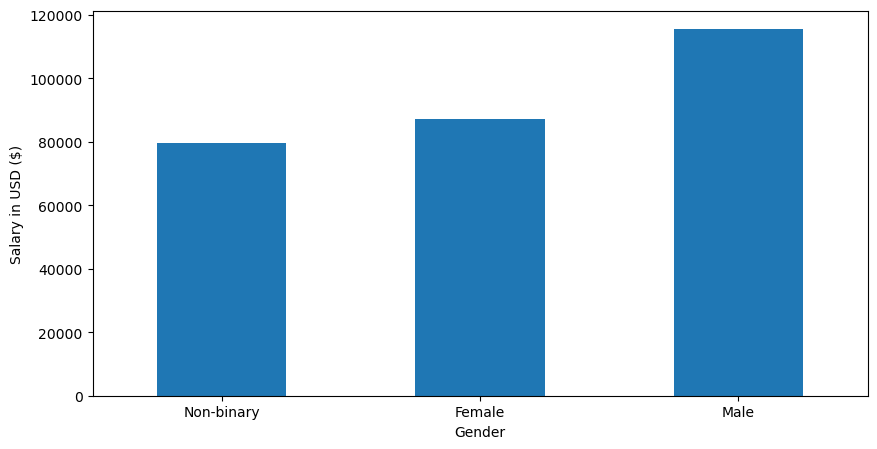

In [15]:
#Visualization 1
#This visualization is designed to show us all the different genders listed in out dataset and their mean salaries in the US
#From this we can answer questions like: What gender makes the most and from that we can look deeper into why that is

#Marks: Area
#Channels: Vertical

#Only extracting data where the country is == to US
usData = df.loc[df['Country'] == 'US']
usDataSeries = usData.groupby(['Gender'])['Salary'].mean()
usDataSeries = usDataSeries.drop(labels= ['Prefer not to answer','Other or prefer not to answer'])
usDataSeries.sort_values(ascending = True, inplace = True)

#plotting usDataSeries in a bargraph
usDataSeries.plot(kind='bar',figsize=(10,5), rot=0)
plt.ylabel("Salary in USD ($)")

In [16]:
top_industry = df['Industry'].value_counts().head(10)

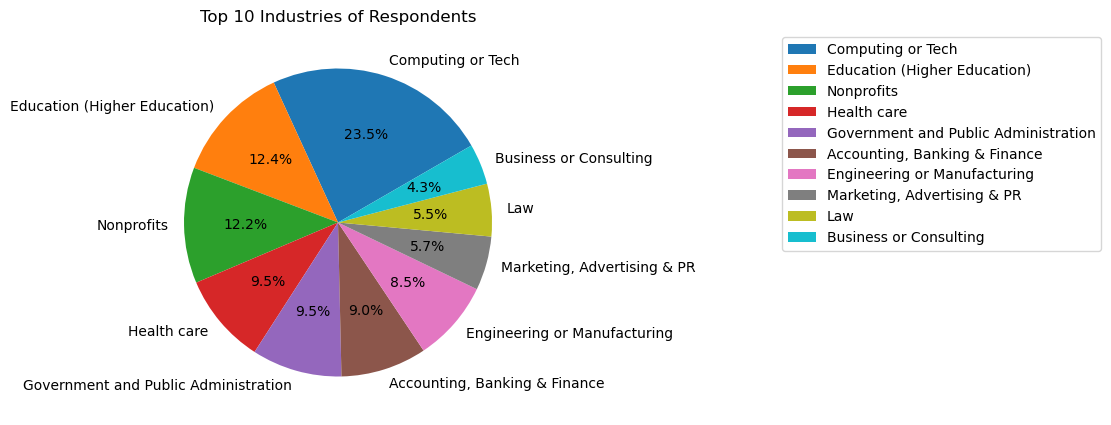

In [17]:
#Visualization #2 - 
#This visualization is designed to show the shares of the top 10 industries in the survey.
#Marks: area 
#Channels: color hue and size

top_industry.plot(kind = 'pie', figsize = (5,5), autopct='%1.1f%%', startangle = 30, shadow = False)
plt.axis('off')
plt.title('Top 10 Industries of Respondents')
plt.legend(bbox_to_anchor=(2.5, 1.0))

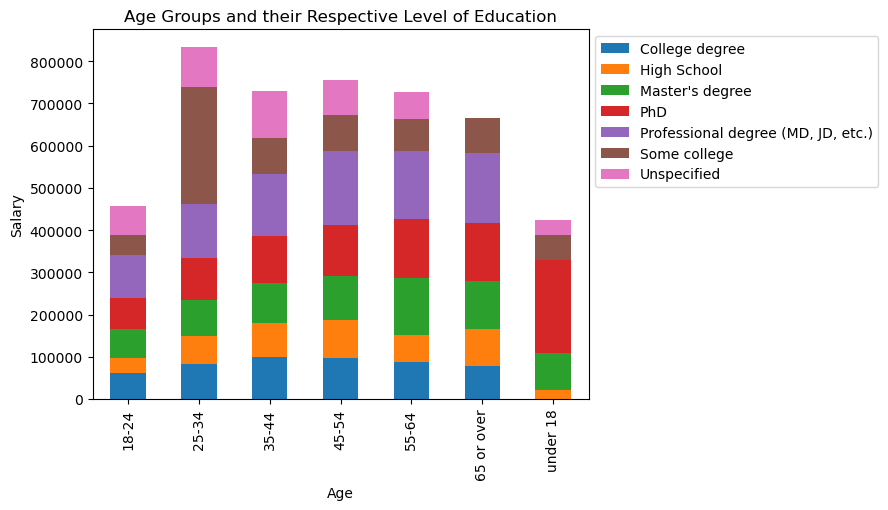

In [18]:
#Stacked bar plot for various education levels. Seperated by age groups while also showing their mean salary

#Visualization 3
#This visualization is designed to show us all the age ranges and their corresponding level of education while
#also giving us the mean salaries of the age group

#Marks: Area
#channels: Color and Vertical


usData2 = df.loc[df['Currency'] == 'USD']
usData2Series = usData2.groupby(['Level of Education', 'Age'])['Salary'].mean().unstack()
usData2Series = usData2Series.T


usData2Series.plot(kind='bar', stacked=True)

plt.title('Age Groups and their Respective Level of Education')
plt.ylabel('Salary')
plt.legend(bbox_to_anchor=(1, 1.0))

